<a href="https://colab.research.google.com/github/ismirnov56/MatmultCUDA/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df1 = pd.read_csv('drive/My Drive/data/pycuda.csv')
df1

,N,cpu,numpy,pycuda,pycuda with shared
0,100,0.057183,0.000284,0.027644,0.028670
1,200,0.248449,0.000291,0.026575,0.027777
2,300,0.569053,0.000814,0.028185,0.028068
3,400,1.040840,0.001703,0.027505,0.028605
4,500,1.720812,0.003247,0.028990,0.030236
5,600,2.545329,0.005421,0.030381,0.030354
6,700,3.625925,0.008664,0.030751,0.031531
7,800,4.940870,0.013333,0.032530,0.033898
8,900,6.345958,0.019449,0.035015,0.036460
9,1000,8.273770,0.027039,0.036918,0.037380


In [ ]:
df2 = pd.read_csv('drive/My Drive/data/numba.csv')
df2

,N,numba,numba_with_shared
0,100,0.001285,0.002439
1,200,0.002064,0.001461
2,300,0.003477,0.001982
3,400,0.005562,0.002540
4,500,0.009097,0.003278
5,600,0.011765,0.004490
6,700,0.013586,0.005399
7,800,0.014847,0.007058
8,900,0.018949,0.008211
9,1000,0.024387,0.009281


# Таблица в которой приведены результаты времени работы

In [ ]:
df = pd.merge(left=df1, right=df2, left_on='N', right_on='N')
df

,N,cpu,numpy,pycuda,pycuda with shared,numba,numba_with_shared
0,100,0.057183,0.000284,0.027644,0.028670,0.001285,0.002439
1,200,0.248449,0.000291,0.026575,0.027777,0.002064,0.001461
2,300,0.569053,0.000814,0.028185,0.028068,0.003477,0.001982
3,400,1.040840,0.001703,0.027505,0.028605,0.005562,0.002540
4,500,1.720812,0.003247,0.028990,0.030236,0.009097,0.003278
5,600,2.545329,0.005421,0.030381,0.030354,0.011765,0.004490
6,700,3.625925,0.008664,0.030751,0.031531,0.013586,0.005399
7,800,4.940870,0.013333,0.032530,0.033898,0.014847,0.007058
8,900,6.345958,0.019449,0.035015,0.036460,0.018949,0.008211
9,1000,8.273770,0.027039,0.036918,0.037380,0.024387,0.009281


# График времени работы

Так как, время при простом CPU, слишком велико не будем его вищуализировать.

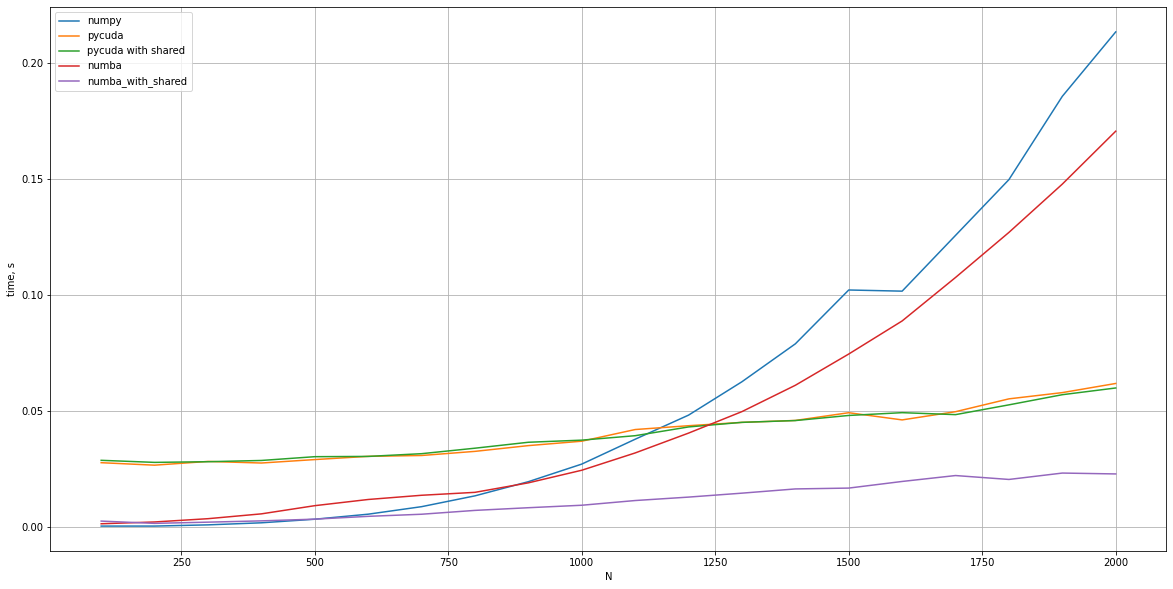

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,10))
for col in df.columns[2:]:
  ax.plot(df['N'], df[col], label=col)
plt.xlabel('N')
plt.ylabel('time, s')
plt.legend()
plt.grid()

Из данного графика видно, что наилучшем образом себя показывает numba with shared. dot с помощью Numpy выполнялся на CPU, но так как она очень адаптирована, время выполнения с помощью неё приближенно к алгоритмам на gpu.

# Расчёт ускорения

## Таблица ускорения

In [ ]:
import seaborn as sns

acc_str = ' acceleration'
df_acc = pd.DataFrame()
df_acc['N'] = df['N']
for col in df.columns[1:]:
  df_acc[col + acc_str] = df['cpu']/df[col]
df_acc

,N,cpu acceleration,numpy acceleration,pycuda acceleration,pycuda with shared acceleration,numba acceleration,numba_with_shared acceleration
0,100,1.0,201.631946,2.068501,1.994511,44.491662,23.449014
1,200,1.0,852.967341,9.349141,8.944310,120.343939,170.042296
2,300,1.0,699.157156,20.189638,20.273946,163.659862,287.079949
3,400,1.0,611.094948,37.842004,36.386590,187.129541,409.769397
4,500,1.0,529.896034,59.357818,56.912132,189.163471,525.000938
5,600,1.0,469.494597,83.780857,83.855219,216.356725,566.910295
6,700,1.0,418.493754,117.910991,114.995549,266.878013,671.572546
7,800,1.0,370.562328,151.888373,145.755676,332.777934,700.061917
8,900,1.0,326.290759,181.235961,174.050798,334.891500,772.818535
9,1000,1.0,305.992269,224.110510,221.344673,339.274962,891.465604


## Граффик ускорения

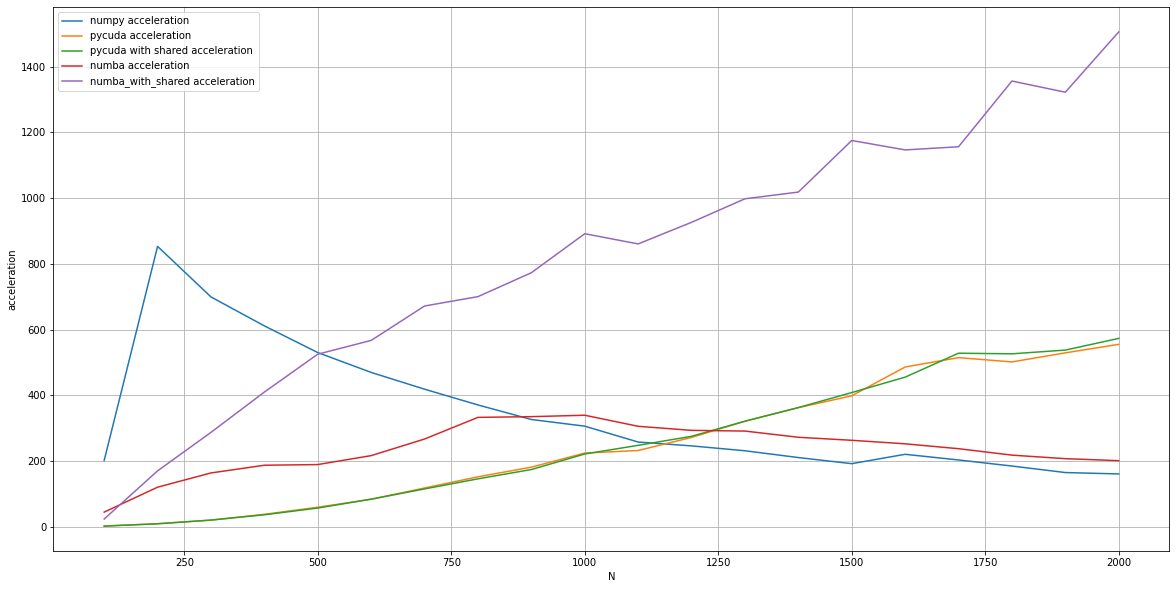

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for col in df_acc.columns[2:]:
  ax.plot(df_acc['N'], df_acc[col], label=col)
plt.xlabel('N')
plt.ylabel('acceleration')
plt.legend()
plt.grid()

# Выводы

При умножении матриц мы получили ускорение на всех алгоритмах по сравнению с CPU, на простой реализации. Выигрыш по ускорению по сравнени с numpy dot был получен начиная от размерности матриц с 1100.